# Task 1 (EDA)
## Keagan Cheong (232188G)
> I am currently using the Used_Car_Prices dataset, this section will be on Exploratory Data Analysis of the dataset

In [21]:
# --- Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

## Load in the dataset

In [3]:
# Load dataset 
df = pd.read_excel("../data/02_Used_Car_Prices.xlsx")

# Preview data
print("Shape:", df.shape)
df.head()

Shape: (6019, 12)


,Brand_Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price (INR Lakhs)
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,175000.0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,1250000.0
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,450000.0
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,600000.0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,1774000.0


## Inspect Data

In [4]:
df.info()
df.describe(include="all").T

# Missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand_Model        6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price (INR Lakhs)  6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


Brand_Model           0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price (INR Lakhs)     0
dtype: int64

## Clean the dataset
We can see that the columns below have X number of missing values:
> Mileage             2  
Engine               36  
Power                36  
Seats                42

Thus we perform a function to fill up the NULL values

In [5]:
# Function to extract numeric part (drop 'kmpl', 'CC', 'bhp')
def extract_number(x):
    if pd.isnull(x):
        return np.nan
    try:
        return float(str(x).split()[0])
    except:
        return np.nan

df["Mileage"] = df["Mileage"].apply(extract_number)
df["Engine"] = df["Engine"].apply(extract_number)
df["Power"] = df["Power"].apply(extract_number)

# Fill missing values
for col in ["Mileage", "Engine", "Power", "Seats"]:
    df[col] = df[col].fillna(df[col].median())

for col in ["Fuel_Type", "Transmission", "Owner_Type", "Location"]:
    df[col] = df[col].fillna(df[col].mode()[0])


## Data Transformation

In [11]:
# Check through all column names neatly
print(df.columns.tolist())

['Brand_Model', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Price_(Inr_Lakhs)']


In [63]:
# --- Data Cleaning & Transformation for Used Car Prices ---

# Copy raw
df_raw = df.copy()

# Rename target column to simpler "Price"
df.rename(columns={"Price_(Inr_Lakhs)": "Price"}, inplace=True)

# Normalize Location column (remove spaces, unify casing)
df["Location"] = df["Location"].astype(str).str.strip().str.title()

# Convert Price to numeric
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")

# Clean numeric fields with text (extract numbers only)
df["Mileage"] = df["Mileage"].astype(str).str.extract(r"(\d+\.?\d*)")[0].astype(float)
df["Engine"] = df["Engine"].astype(str).str.extract(r"(\d+\.?\d*)")[0].astype(float)
df["Power"]  = df["Power"].astype(str).str.extract(r"(\d+\.?\d*)")[0].astype(float)

# Convert other fields to numeric
df["Seats"] = pd.to_numeric(df["Seats"], errors="coerce")
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")
df["Kilometers_Driven"] = pd.to_numeric(df["Kilometers_Driven"], errors="coerce")

# Ensure categorical fields
cat_cols = ["Owner_Type", "Fuel_Type", "Transmission", "Location", "Brand_Model"]
for col in cat_cols:
    df[col] = df[col].astype("category")

# Add Brand column (first token from Brand_Model)
df["Brand"] = df["Brand_Model"].astype(str).apply(lambda x: x.split()[0])

# Handle missing values
for col in df.select_dtypes(include=[np.number]).columns:
    df[col] = df[col].fillna(df[col].median())

for col in df.select_dtypes(include=["category"]).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Final check
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Brand_Model        6019 non-null   category
 1   Location           6019 non-null   category
 2   Year               6019 non-null   int64   
 3   Kilometers_Driven  6019 non-null   int64   
 4   Fuel_Type          6019 non-null   category
 5   Transmission       6019 non-null   category
 6   Owner_Type         6019 non-null   category
 7   Mileage            6019 non-null   float64 
 8   Engine             6019 non-null   float64 
 9   Power              6019 non-null   float64 
 10  Seats              6019 non-null   float64 
 11  Price              6019 non-null   float64 
 12  Brand              6019 non-null   object  
dtypes: category(5), float64(5), int64(2), object(1)
memory usage: 491.7+ KB
None
Brand_Model          0
Location             0
Year                 0
Kilomet

## Save this to a new cleaned excel for reuse!

In [50]:
# Save cleaned dataset (overwrite existing)
df.to_excel("../data/02_Used_Car_Prices_Cleaned.xlsx", index=False)
print("Updated cleaned dataset saved as 02_Used_Car_Prices_Cleaned.xlsx")

Updated cleaned dataset saved as 02_Used_Car_Prices_Cleaned.xlsx


## Normal Basic EDA (Numeric Distributions)


### Price & Year

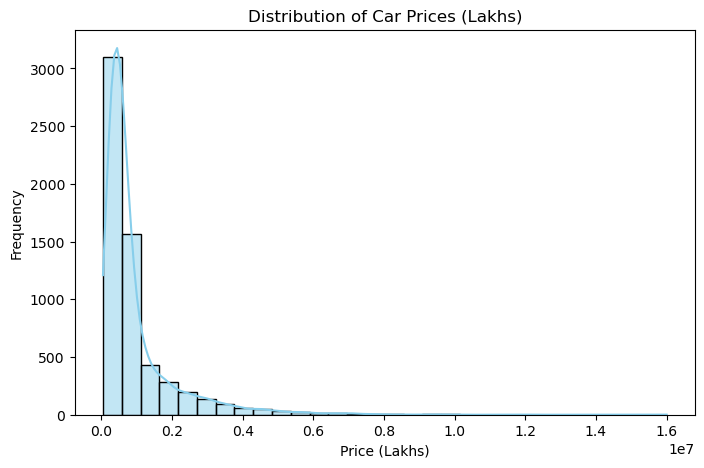

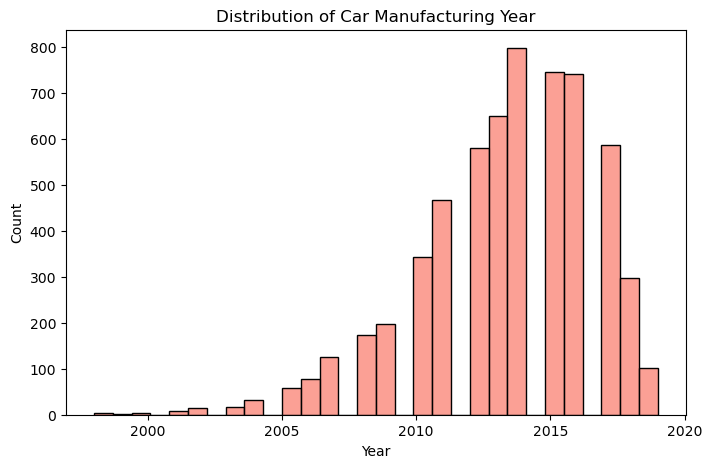

In [15]:
# Price distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Price"], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Car Prices (Lakhs)")
plt.xlabel("Price (Lakhs)")
plt.ylabel("Frequency")
plt.show()

# Year distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Year"], bins=30, kde=False, color="salmon")
plt.title("Distribution of Car Manufacturing Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

### Kilometers Driven & Mileage

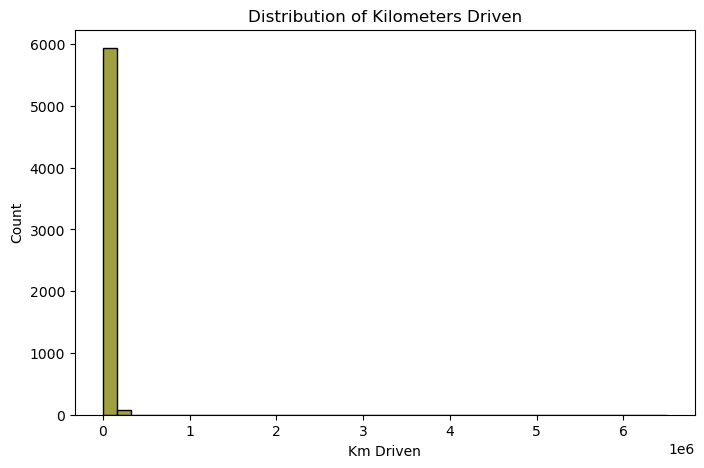

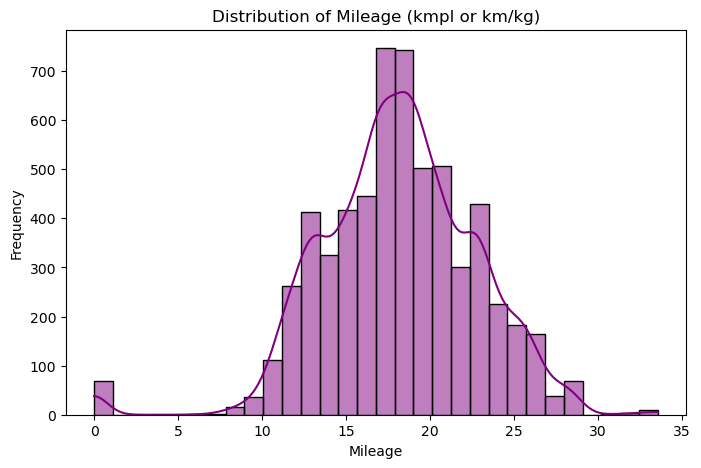

In [52]:
# Kilometers Driven
plt.figure(figsize=(8,5))
sns.histplot(df["Kilometers_Driven"], bins=40, kde=False, color="olive")
plt.title("Distribution of Kilometers Driven")
plt.xlabel("Km Driven")
plt.ylabel("Count")
plt.show()

# Mileage
plt.figure(figsize=(8,5))
sns.histplot(df["Mileage"], bins=30, kde=True, color="purple")
plt.title("Distribution of Mileage (kmpl or km/kg)")
plt.xlabel("Mileage")
plt.ylabel("Frequency")
plt.show()


### Engine & Power

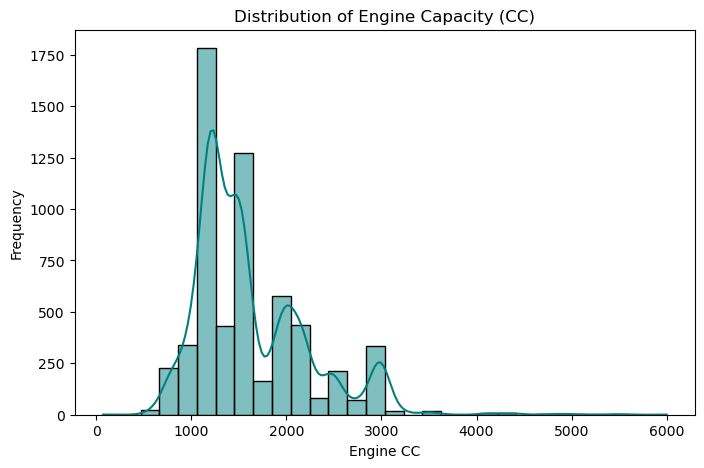

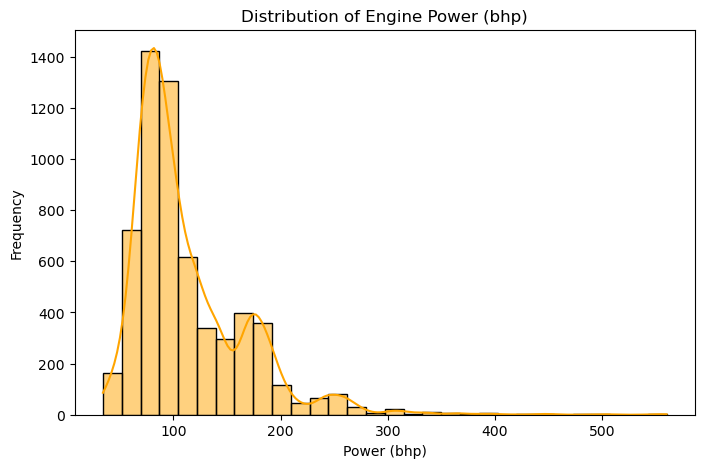

In [51]:
# Engine CC
plt.figure(figsize=(8,5))
sns.histplot(df["Engine"], bins=30, kde=True, color="teal")
plt.title("Distribution of Engine Capacity (CC)")
plt.xlabel("Engine CC")
plt.ylabel("Frequency")
plt.show()

# Power bhp
plt.figure(figsize=(8,5))
sns.histplot(df["Power"], bins=30, kde=True, color="orange")
plt.title("Distribution of Engine Power (bhp)")
plt.xlabel("Power (bhp)")
plt.ylabel("Frequency")
plt.show()

## Normal Basic EDA (Categorical Distributions)

### Fuel Type

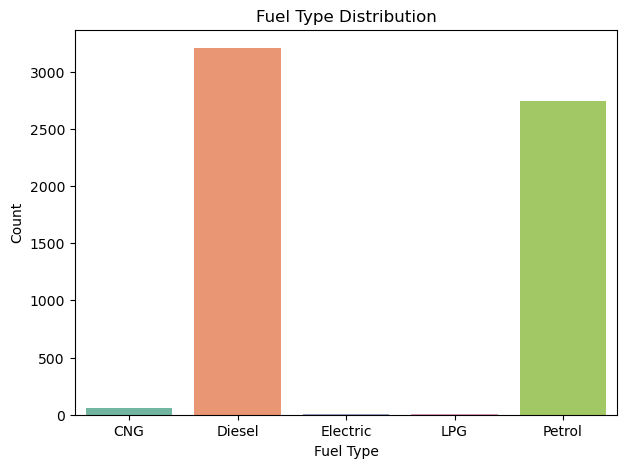

In [53]:
plt.figure(figsize=(7,5))
sns.countplot(x="Fuel_Type", data=df, palette="Set2")
plt.title("Fuel Type Distribution")
plt.xlabel("Fuel Type")
plt.ylabel("Count")
plt.show()
warnings.filterwarnings("ignore")

### Transmission

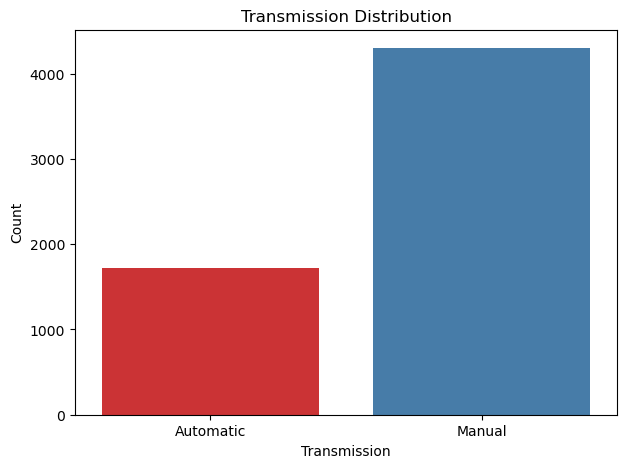

In [54]:
plt.figure(figsize=(7,5))
sns.countplot(x="Transmission", data=df, palette="Set1")
plt.title("Transmission Distribution")
plt.xlabel("Transmission")
plt.ylabel("Count")
plt.show()
warnings.filterwarnings("ignore")

### Owner Type

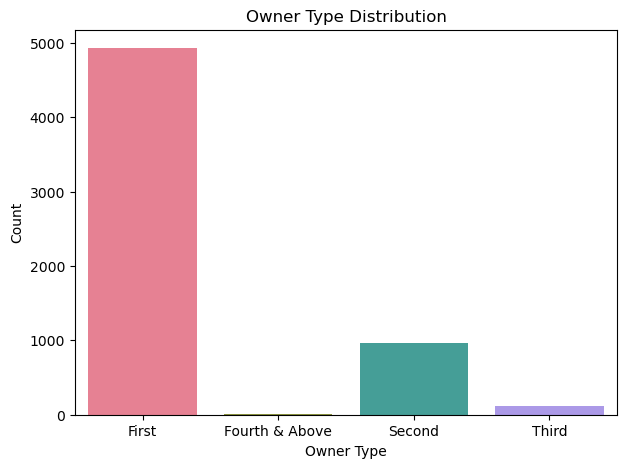

In [55]:
plt.figure(figsize=(7,5))
sns.countplot(x="Owner_Type", data=df, palette="husl")
plt.title("Owner Type Distribution")
plt.xlabel("Owner Type")
plt.ylabel("Count")
plt.show()
warnings.filterwarnings("ignore")

### Top Brands

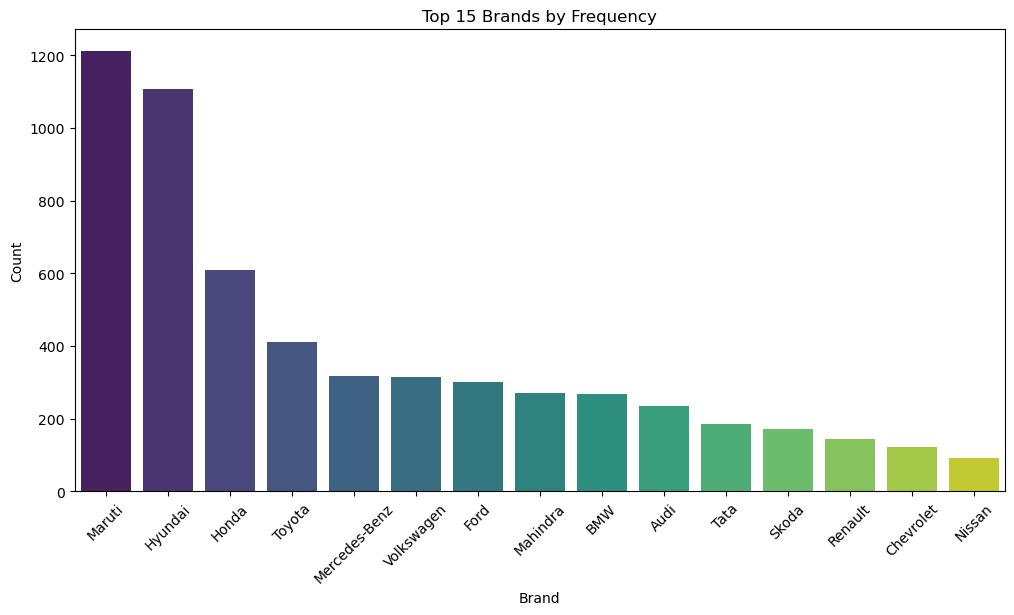

In [56]:
top_brands = df["Brand"].value_counts().head(15)
plt.figure(figsize=(12,6))
sns.barplot(x=top_brands.index, y=top_brands.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Top 15 Brands by Frequency")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.show()
warnings.filterwarnings("ignore")

## Insights from Basic EDA

1. **Price Distribution**  
   - Car prices (in INR Lakhs) are right-skewed, with most vehicles priced in the lower range (typically under ~15 Lakhs).  
   - A small number of luxury/high-end vehicles stretch the tail far to the right, introducing strong outliers.

2. **Year Distribution**  
   - Majority of cars are between **2010–2018** models.  
   - Very old vehicles (before 2005) and brand-new models (post-2019) form only a small fraction, showing the dataset mainly captures mid-age used cars.

3. **Kilometers Driven**  
   - Strong right skew — most cars are clustered under ~100,000 km, while some extreme outliers exceed 200,000–300,000 km.  
   - This suggests mileage normalization (e.g., log-transform) will help modeling.

4. **Mileage (Fuel Efficiency)**  
   - Mileage values mostly fall between **15–25 kmpl**, typical of petrol and diesel cars in India.  
   - Some extreme values (e.g., <5 or >30 kmpl) may be data entry errors or special cases (e.g., CNG cars).

5. **Engine Capacity**  
   - Peaks around **1000–1600 CC**, common for compact cars and sedans.  
   - Larger engines (>2500 CC) are rare, reflecting the niche SUV/luxury segment.

6. **Power (BHP)**  
   - Most cars produce **50–120 bhp**, which aligns with compact/mid-segment vehicles.  
   - Outliers (300+ bhp) represent performance/luxury cars and will influence price strongly.

7. **Fuel Type Distribution**  
   - **Petrol cars dominate**, followed by Diesel.  
   - Alternative fuels (CNG/LPG/Electric) form a very small proportion, likely concentrated in urban markets.

8. **Transmission Distribution**  
   - Majority are **Manual transmission** cars, reflecting Indian market trends.  
   - Automatics are present but still a minority, concentrated in higher-priced models.

9. **Owner Type**  
   - Most cars are **First-hand owners**, followed by a smaller share of Second-hand.  
   - Third-hand and beyond are rare, and such cars usually trade at lower prices.

10. **Top Brands by Frequency**  
    - Brands like **Maruti, Hyundai, Honda, and Toyota** dominate the dataset, reflecting their market share in India.  
    - Premium brands (BMW, Mercedes, Audi) appear far less frequently but likely have higher price brackets.


## Advanced Data Visualisations 

### Outlier Detection

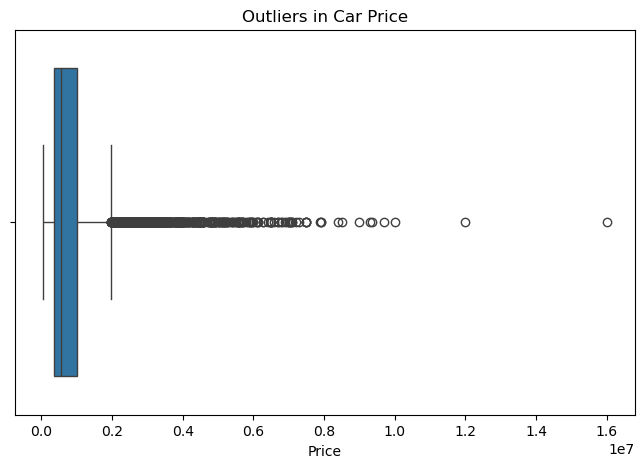

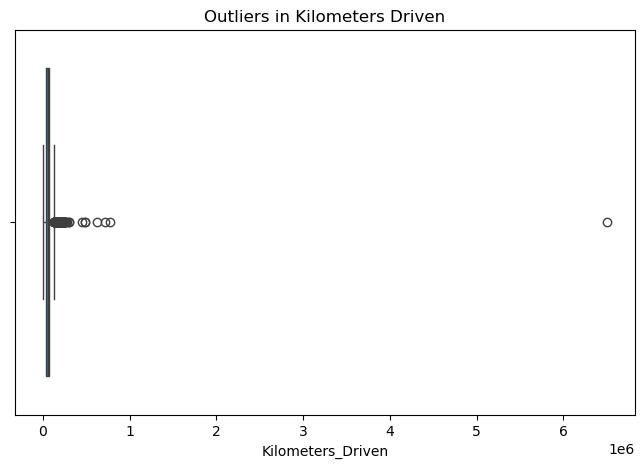

In [57]:
# Price outliers
plt.figure(figsize=(8,5))
sns.boxplot(x=df["Price"])
plt.title("Outliers in Car Price")
plt.show()

# Km Driven outliers
plt.figure(figsize=(8,5))
sns.boxplot(x=df["Kilometers_Driven"])
plt.title("Outliers in Kilometers Driven")
plt.show()


### Relationships with Log Transform

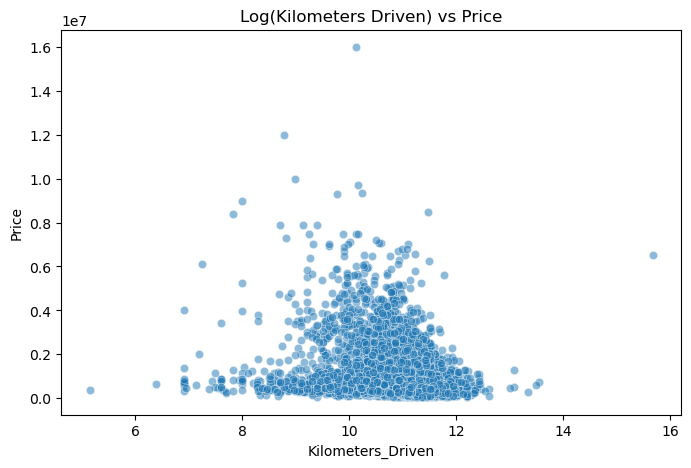

In [58]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=np.log1p(df["Kilometers_Driven"]), y="Price", alpha=0.5, data=df)
plt.title("Log(Kilometers Driven) vs Price")
plt.show()

### Price by Fuel Type & Transmission

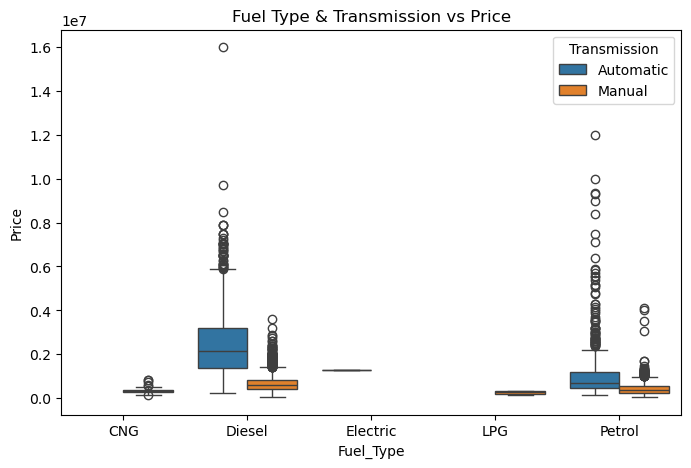

In [59]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Fuel_Type", y="Price", hue="Transmission", data=df)
plt.title("Fuel Type & Transmission vs Price")
plt.show()

### Brand Analysis

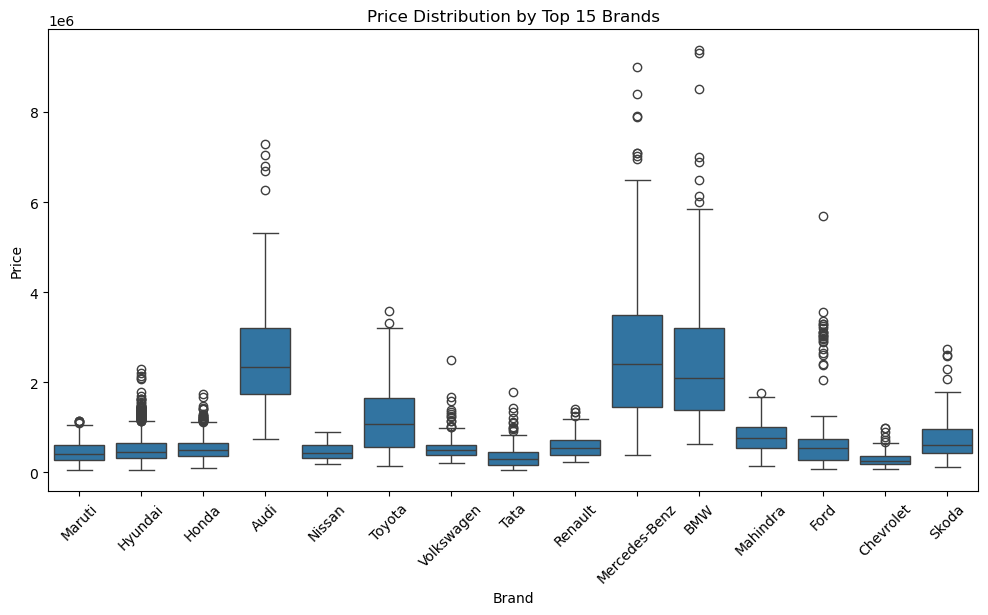

In [60]:
# Top 15 brands by count
top_brands = df["Brand"].value_counts().head(15).index
plt.figure(figsize=(12,6))
sns.boxplot(x="Brand", y="Price", data=df[df["Brand"].isin(top_brands)])
plt.xticks(rotation=45)
plt.title("Price Distribution by Top 15 Brands")
plt.show()

### Location Analysis

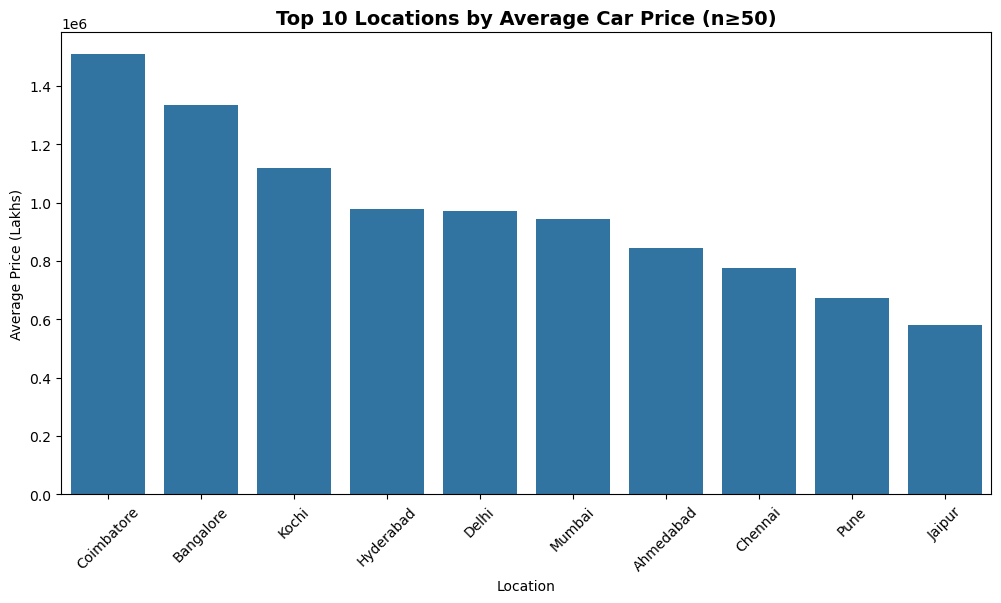

In [70]:
# 1) Build a tidy table with mean + count
city_stats = (
    df.groupby("Location", as_index=False)
      .agg(mean_price=("Price","mean"), n=("Price","size"))
)

# 2) (Optional) require a minimum sample size to avoid noisy cities
MIN_N = 50
city_stats = city_stats[city_stats["n"] >= MIN_N]

# 3) Take top-10 by mean price
top10 = city_stats.sort_values("mean_price", ascending=False).head(10)

# 4) Plot using column names (prevents index/value misalignment)
plt.figure(figsize=(12,6))
sns.barplot(data=top10, x="Location", y="mean_price")
plt.xticks(rotation=45)
plt.title(f"Top 10 Locations by Average Car Price (n≥{MIN_N})", fontsize=14, fontweight="bold")
plt.xlabel("Location")
plt.ylabel("Average Price (Lakhs)")
plt.show()

### Seats Vs Price

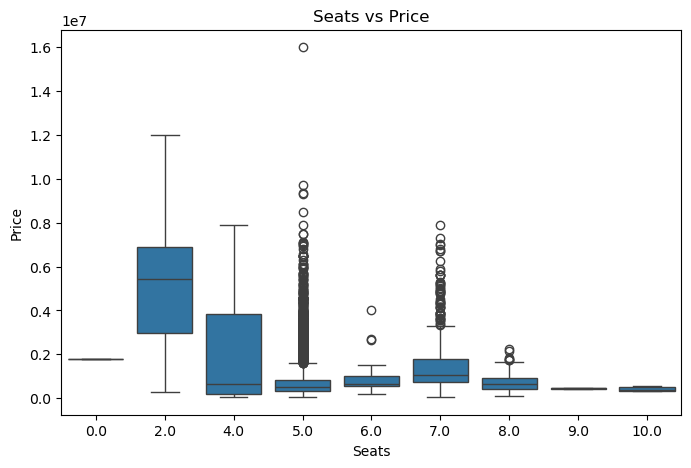

In [71]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Seats", y="Price", data=df)
plt.title("Seats vs Price")
plt.show()

### Engine & Power

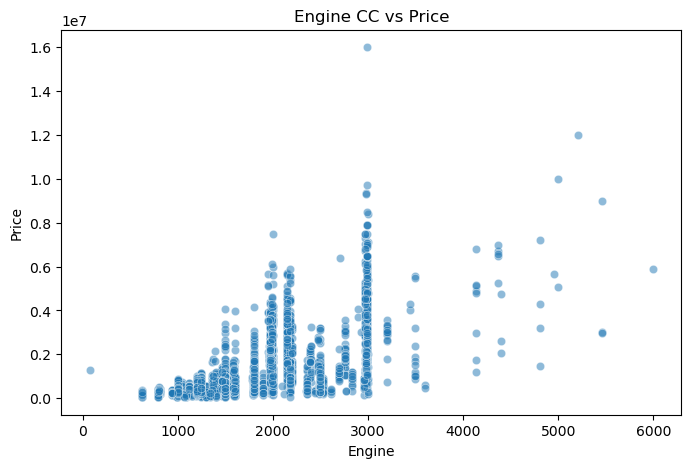

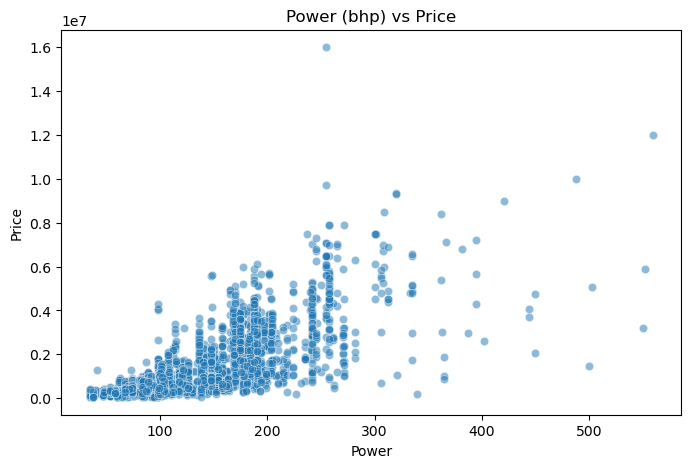

In [72]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Engine", y="Price", data=df, alpha=0.5)
plt.title("Engine CC vs Price")
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x="Power", y="Price", data=df, alpha=0.5)
plt.title("Power (bhp) vs Price")
plt.show()


### Multivariate Heatmap

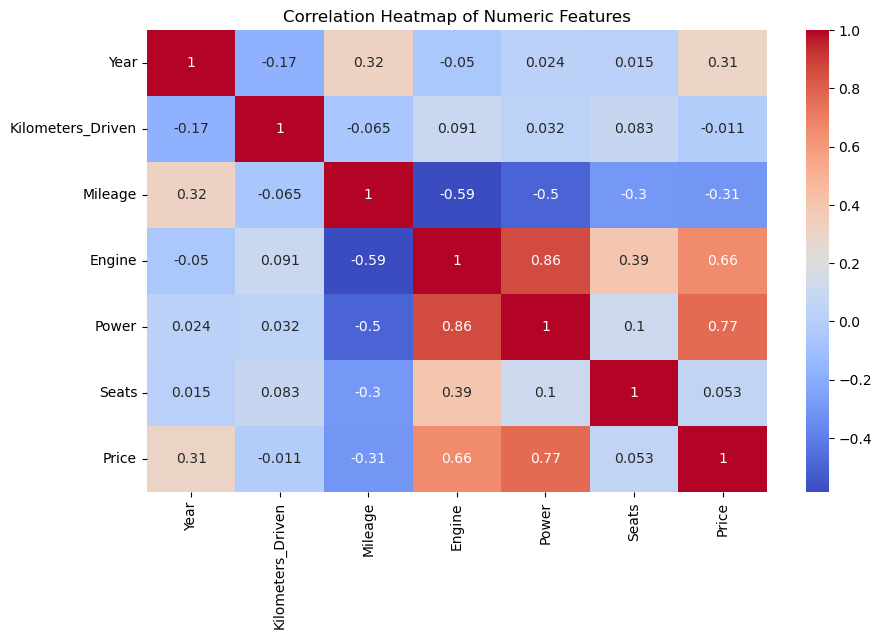

In [73]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

## Insights from Advanced EDA

1. **Outliers in Price & Kilometers Driven**  
   - Price outliers are concentrated in luxury brands, with values far above the median.  
   - Kilometers Driven shows heavy skew, confirming the need for transformations (log scale) for better model stability.

2. **Log(Kilometers Driven) vs Price**  
   - Clear negative trend: higher kilometers reduce resale value.  
   - After log transformation, the relationship is smoother and more linear, useful for regression modeling.

3. **Fuel Type & Transmission vs Price**  
   - Diesel cars often command higher prices than petrol in similar segments.  
   - Automatics generally skew toward higher prices, likely because they are concentrated in mid-to-premium vehicles.

4. **Brand vs Price (Top 15)**  
   - Premium/luxury brands (BMW, Audi, Mercedes) dominate the upper price ranges.  
   - Mass-market brands (Maruti, Hyundai) are clustered in the lower-to-mid price ranges.  
   - This reinforces brand reputation as a strong price driver.

5. **Location vs Price (Top 10 Cities)**  
   - Major metro cities (Delhi, Mumbai, Bangalore) show higher average prices, reflecting stronger demand and higher cost of living.  
   - Smaller cities exhibit lower resale values, even for similar car models.

6. **Seats vs Price**  
   - Standard 5-seater cars dominate.  
   - 7-seater vehicles (SUVs, MUVs) are priced higher on average, indicating capacity contributes positively to resale value.  
   - Very low seat counts (2) are rare — likely luxury sports cars.

7. **Engine CC vs Price**  
   - Positive correlation: larger engines generally command higher prices.  
   - Relationship flattens after ~2500 CC, possibly due to limited demand for very large engines in India.

8. **Power (BHP) vs Price**  
   - Cars with higher horsepower tend to be priced higher, but relationship is non-linear.  
   - Mid-range (~80–150 bhp) forms the bulk of affordable vehicles.  
   - Outliers (300+ bhp) are concentrated in luxury/performance segments.

9. **Correlation Heatmap**  
   - Strongest positive correlations: **Price with Engine, Power, Year**.  
   - Negative correlation: **Kilometers Driven** with Price.  
   - Mileage shows weaker correlation, possibly because efficiency alone doesn’t drive resale value compared to age and power.
